<h1><center><font size="6">Modeling, Feature Selection and Notebook</font></center></h1>

# <a id='0'>Contents</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Importing Packages</a>  
- <a href='#3'>Uploading Data</a>
- <a href='#4'>Creating Train, Validation, and Testing Sets</a>  
- <a href='#5'>Data Cleaning</a>  
- <a href='#5'>Exploratory Data Analysis</a>
- <a href='#6'>Feature Engineering</a>  

# Importing Packages

In [50]:
import numpy as np 
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report, plot_confusion_matrix, auc
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

%reload_ext autoreload
%autoreload 2

from utils import *

# Modeling Base Model without Feature Engineering

In [37]:
train = pd.read_csv("../data/train_cleaned.csv")
validate = pd.read_csv("../data/validate_cleaned.csv")

In [38]:
train.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,1785.87,2,2,1,44,0,0,0,0,0,...,798.64,845.04,979.41,107.72,178.69,107.15,107.15,178.59,33.00,0
1,5714.80,2,3,1,46,0,0,0,0,0,...,147.41,142.69,30.07,83.69,173.44,35.72,142.69,30.07,939.83,0
2,3571.75,2,2,1,47,0,0,0,0,0,...,223.95,-14.14,-14.14,238.09,0.00,223.95,0.00,0.00,0.00,1
3,6071.97,2,2,1,29,0,0,0,0,0,...,2282.45,1553.89,1571.39,79.83,89.04,92.33,60.11,67.90,75.40,0
4,5357.62,2,1,2,33,0,0,0,0,0,...,1195.07,992.95,80.76,964.62,1168.50,1195.64,993.23,80.76,6052.86,0


In [39]:
validate.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,1071.52,1,2,2,25,0,0,0,0,0,...,449.33,489.90,529.62,53.58,71.43,53.58,53.58,53.58,71.43,0
1,5357.62,2,1,2,26,0,0,0,0,0,...,3628.22,2776.71,2759.67,160.23,151.26,112.90,94.54,95.33,95.33,0
2,2500.22,2,3,1,32,0,0,0,0,0,...,2491.40,2504.19,2507.80,86.83,111.15,107.15,87.08,89.29,91.22,0
3,4643.27,1,3,2,49,0,0,0,0,0,...,603.55,401.32,248.02,57.51,64.58,250.52,0.96,250.42,157.44,0
4,1785.87,2,2,2,36,0,0,0,0,0,...,699.13,724.89,694.31,71.43,53.58,35.72,64.29,0.00,35.72,1


In [40]:
X_train = train.drop(["default"], axis=1)
y_tr = train["default"]
X_validate = validate.drop(["default"], axis=1)
y_val = validate["default"]


In [6]:
# # Grab indices of columns for creating dummy variables and create dataframe with dummy variables
# dum_feat = X_train[['gender', 'education', 'marriage']]
# dum_index = dum_feat.columns
# tr_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['sex', 'edu', 'mar'])
# tr_dum.head()

In [7]:
# dum_feat = X_validate[['gender', 'education', 'marriage']]
# dum_index = dum_feat.columns
# val_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['sex', 'edu', 'mar'])
# val_dum.head()

In [8]:
# X_tr_dum = X_train.drop(['gender', 'education', 'marriage'], axis=1)
# X_tr_dum = X_tr_dum.join(tr_dum, how="left")
# X_val_dum = X_validate.drop(['gender', 'education', 'marriage'], axis=1)
# X_val_dum = X_val_dum.join(val_dum, how="left")

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)
X_val = scaler.transform(X_validate)

Training Accuracy:  0.8207142857142857
Validation Accuracy:  0.8168333333333333
Training F1 Score:  0.4603697864411639
Validation F1 Score:  0.4372759856630825
Training AUC Score:  0.7615982535285184
Validation AUC Score:  0.7613570682370628
Training Recall Score:  0.3449312714776632
Validation Recall Score:  0.32520944402132523
Training Precision Score:  0.6919431279620853
Validation Precision Score:  0.6671875
Training Average Precision Score:  0.5357662754871487
Validation Average Precision Score:  0.5130659708957399

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16344
           1       0.69      0.34      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.8

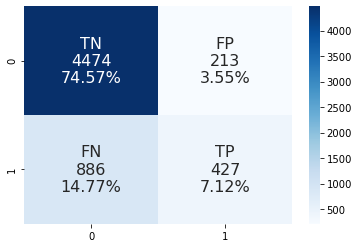

In [51]:
logreg = LogisticRegression(solver="liblinear", random_state=42).fit(X_tr, y_tr)
y_pred_log_tr = logreg.predict(X_tr)
y_pred_log_val = logreg.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_log_tr, y_pred_log_val, logreg)

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.8136666666666666
Training F1 Score:  0.9988180939078113
Validation F1 Score:  0.4572815533980582
Training AUC Score:  0.9999957554544644
Validation AUC Score:  0.7581782574705913
Training Recall Score:  0.9982817869415808
Validation Recall Score:  0.3587204874333587
Training Precision Score:  0.9993549774242099
Validation Precision Score:  0.6305220883534136
Training Average Precision Score:  0.9999854332226671
Validation Average Precision Score:  0.5133738880873635

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      1.00      1.00      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0  

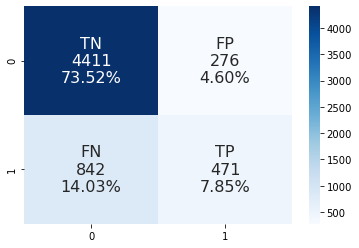

In [52]:
rfc = RandomForestClassifier().fit(X_tr, y_tr)
y_pred_rfc_tr = rfc.predict(X_tr)
y_pred_rfc_val = rfc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_rfc_tr, y_pred_rfc_val, rfc)

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.725
Training F1 Score:  0.9988173314697344
Validation F1 Score:  0.38340807174887886
Training AUC Score:  0.9999991983985211
Validation AUC Score:  0.6049766405141607
Training Recall Score:  0.9976374570446735
Validation Recall Score:  0.3907083015993907
Training Precision Score:  1.0
Validation Precision Score:  0.3763756419662509
Training Average Precision Score:  0.9999948438742888
Validation Average Precision Score:  0.2806265257466069

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      1.00      1.00      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.

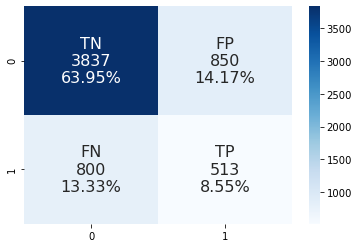

In [53]:
dtc = DecisionTreeClassifier().fit(X_tr, y_tr)
y_pred_dtc_tr = dtc.predict(X_tr)
y_pred_dtc_val = dtc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_dtc_tr, y_pred_dtc_val, dtc)

Training Accuracy:  0.843047619047619
Validation Accuracy:  0.795
Training F1 Score:  0.573829842254978
Validation F1 Score:  0.4409090909090909
Training AUC Score:  0.8808282078146316
Validation AUC Score:  0.7034749256219216
Training Recall Score:  0.47658934707903783
Validation Recall Score:  0.3693830921553694
Training Precision Score:  0.7209226770630279
Validation Precision Score:  0.5467869222096956
Training Average Precision Score:  0.6406080686603904
Validation Average Precision Score:  0.4197396446674167

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16344
           1       0.72      0.48      0.57      4656

    accuracy                           0.84     21000
   macro avg       0.79      0.71      0.74     21000
weighted avg       0.83      0.84      0.83     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84     

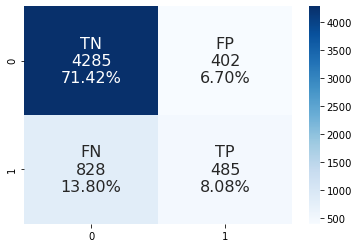

In [54]:
knn = KNeighborsClassifier().fit(X_tr, y_tr)
y_pred_knn_tr = knn.predict(X_tr)
y_pred_knn_val = knn.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_knn_tr, y_pred_knn_val, knn)

Training Accuracy:  0.7695238095238095
Validation Accuracy:  0.7656666666666667
Training F1 Score:  0.520126908586159
Validation F1 Score:  0.5097629009762901
Training AUC Score:  0.7484319229562684
Validation AUC Score:  0.7458567400781699
Training Recall Score:  0.5633591065292096
Validation Recall Score:  0.5567402894135567
Training Precision Score:  0.4830570902394107
Validation Precision Score:  0.470096463022508
Training Average Precision Score:  0.5028264895403012
Validation Average Precision Score:  0.48341103710889494

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     16344
           1       0.48      0.56      0.52      4656

    accuracy                           0.77     21000
   macro avg       0.68      0.70      0.68     21000
weighted avg       0.78      0.77      0.78     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0   

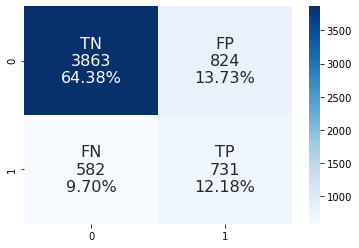

In [55]:
gnb = GaussianNB().fit(X_tr, y_tr)
y_pred_gnb_tr = gnb.predict(X_tr)
y_pred_gnb_val = gnb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gnb_tr, y_pred_gnb_val, gnb)

Training Accuracy:  0.819952380952381
Validation Accuracy:  0.8153333333333334
Training F1 Score:  0.4511540136449411
Validation F1 Score:  0.4235171696149844
Training AUC Score:  0.7873281037904132
Validation AUC Score:  0.7762876885085563
Training Recall Score:  0.3337628865979381
Validation Recall Score:  0.30997715156131
Training Precision Score:  0.6959247648902821
Validation Precision Score:  0.6683087027914614
Training Average Precision Score:  0.5585736608944247
Validation Average Precision Score:  0.5247647859929081

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16344
           1       0.70      0.33      0.45      4656

    accuracy                           0.82     21000
   macro avg       0.77      0.65      0.67     21000
weighted avg       0.80      0.82      0.79     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0     

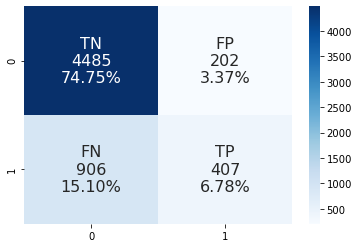

In [56]:
abc = AdaBoostClassifier().fit(X_tr, y_tr)
y_pred_abc_tr = abc.predict(X_tr)
y_pred_abc_val = abc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_abc_tr, y_pred_abc_val, abc)

Training Accuracy:  0.8215714285714286
Validation Accuracy:  0.8196666666666667
Training F1 Score:  0.4799444829979181
Validation F1 Score:  0.4643564356435644
Training AUC Score:  0.7601189045697907
Validation AUC Score:  0.7575676820607501
Training Recall Score:  0.3713487972508591
Validation Recall Score:  0.3571972581873572
Training Precision Score:  0.6783052177324441
Validation Precision Score:  0.6633663366336634
Training Average Precision Score:  0.5343333116183251
Validation Average Precision Score:  0.5117838827258787

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16344
           1       0.68      0.37      0.48      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.66      0.69     21000
weighted avg       0.81      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0  

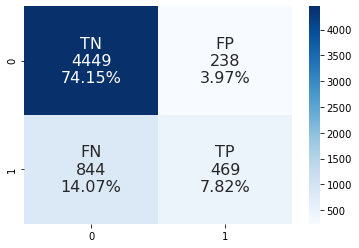

In [57]:
lda = LinearDiscriminantAnalysis().fit(X_tr, y_tr)
y_pred_lda_tr = lda.predict(X_tr)
y_pred_lda_val = lda.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_lda_tr, y_pred_lda_val, lda)

Training Accuracy:  0.8287142857142857
Validation Accuracy:  0.8198333333333333
Training F1 Score:  0.5039304923458833
Validation F1 Score:  0.4645864289252105
Training AUC Score:  0.8093206777017491
Validation AUC Score:  0.7813393367696719
Training Recall Score:  0.39239690721649484
Validation Recall Score:  0.3571972581873572
Training Precision Score:  0.7040462427745665
Validation Precision Score:  0.6643059490084986
Training Average Precision Score:  0.6080316518725907
Validation Average Precision Score:  0.5478304534781666

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16344
           1       0.70      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.78      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0 

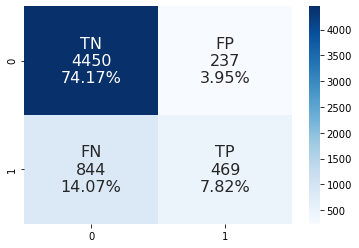

In [58]:
gbc = GradientBoostingClassifier().fit(X_tr, y_tr)
y_pred_gbc_tr = gbc.predict(X_tr)
y_pred_gbc_val = gbc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gbc_tr, y_pred_gbc_val, gbc)

[09:18:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.891095238095238
Validation Accuracy:  0.8143333333333334
Training F1 Score:  0.6986427724337858
Validation F1 Score:  0.46493756003842457
Training AUC Score:  0.9490677926723217
Validation AUC Score:  0.7631011283498572
Training Recall Score:  0.569372852233677
Validation Recall Score:  0.3686214775323686
Training Precision Score:  0.9038527105352882
Validation Precision Score:  0.6293888166449935
Training Average Precision Score:  0.8672532450149335
Validation Average Precision Score:  0.5219345828970757

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     16344
           1 

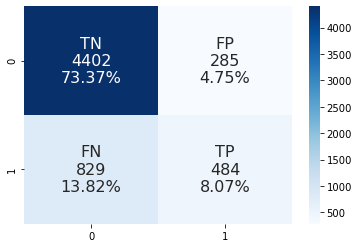

In [59]:
xgb = XGBClassifier().fit(X_tr, y_tr)
y_pred_xgb_tr = xgb.predict(X_tr)
y_pred_xgb_val = xgb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_xgb_tr, y_pred_xgb_val, xgb)

In [ ]:
model =  pd.DataFrame([[accuracy_score(y_tr, y_pred_tr), 
                        accuracy_score(y_val, y_pred_val),
                        f1_score(y_tr, y_pred_tr),
                        f1_score(y_val, y_pred_val)
    au_tr = auc(X_tr, y_tr, model)
    au_val = auc(X_val, y_val, model)
    rc_tr = recall_score(y_tr, y_pred_tr)
    rc_val = recall_score(y_val, y_pred_val)
    pr_tr = precision_score(y_tr, y_pred_tr)
    pr_val = precision_score(y_val, y_pred_val)
    aps_tr = aps(X_tr, y_tr, model)
    aps_val = aps(X_val, y_val, model),
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

# Modeling with Feature Engineering

In [42]:
train2 = pd.read_csv("../data/train_feature.csv")
validate2 = pd.read_csv("../data/validate_feature.csv")

In [44]:
train2.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,avail4,avail3,avail2,avail1,avg_av,pperb1,pperb2,pperb3,pperb4,pperb5
0,1785.81,2,2,1,44,0,0,0,0,0,...,0.552802,0.285937,0.161882,0.088442,0.344578,0.071971,0.140129,0.134171,0.126803,0.182342
1,5714.59,2,3,1,46,0,0,0,0,0,...,0.974206,0.969650,0.985388,0.844349,0.957227,1.002156,1.000000,0.242334,1.000000,1.000000
2,3571.62,2,2,1,47,0,0,0,0,0,...,0.937300,1.000000,0.933341,0.933341,0.968650,1.000000,0.000000,1.000000,-0.000000,-0.000000
3,6071.75,2,2,1,29,0,0,0,0,0,...,0.624100,0.627547,0.631912,0.534759,0.650602,0.035719,0.039373,0.040454,0.038685,0.043212
4,5357.43,2,1,2,33,0,0,0,0,0,...,0.776940,0.781987,0.821021,0.837379,0.836153,1.005965,1.000402,1.000477,1.000292,1.000000


In [43]:
validate2.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,avail4,avail3,avail2,avail1,avg_av,pperb1,pperb2,pperb3,pperb4,pperb5
0,1071.49,1,2,2,25,0,0,0,0,0,...,0.580668,0.613967,0.664598,0.704533,0.602051,0.149062,0.172691,0.119227,0.109353,0.101152
1,5357.43,2,1,2,26,0,0,0,0,0,...,0.322793,0.222106,0.162326,0.088427,0.293714,0.035701,0.036295,0.031118,0.034049,0.034545
2,2500.13,2,3,1,32,0,0,0,0,0,...,0.003528,0.020999,0.013139,-0.001744,0.005217,0.035193,0.045411,0.043010,0.034775,0.035606
3,4643.11,1,3,2,49,0,0,0,0,0,...,0.870016,0.875601,0.854184,0.840939,0.883482,0.084929,0.111790,0.415075,0.002392,1.009677
4,1785.81,2,2,2,36,0,0,0,0,0,...,0.608519,0.152782,0.047301,-0.884562,0.188226,0.041985,0.035407,0.051094,0.088693,0.000000


In [45]:
X_train2 = train2.drop(["default"], axis=1)
y_tr = train2["default"]
X_validate2 = validate2.drop(["default"], axis=1)
y_val = validate2["default"]

In [46]:
scaler = StandardScaler()
scaler.fit(X_train2)
X_tr2 = scaler.transform(X_train2)
X_val2 = scaler.transform(X_validate2)

Training Accuracy:  0.8204761904761905
Validation Accuracy:  0.817
Training F1 Score:  0.458955223880597
Validation F1 Score:  0.43634496919917864
Training AUC Score:  0.7624161629981178
Validation AUC Score:  0.7562751958838038
Training Recall Score:  0.3434278350515464
Validation Recall Score:  0.32368621477532367
Training Precision Score:  0.6916089965397924
Validation Precision Score:  0.6692913385826772

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16344
           1       0.69      0.34      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.67      0.32      0.44      1313

    accuracy               

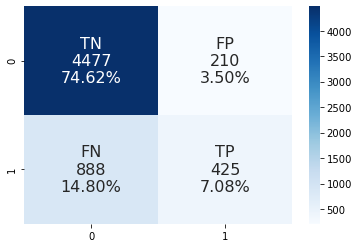

In [24]:
logreg2 = LogisticRegression(solver="liblinear", random_state=42).fit(X_tr2, y_tr)
y_pred_log_tr2 = logreg2.predict(X_tr2)
y_pred_log_val2 = logreg2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_log_tr2, y_pred_log_val2, logreg2)

Training Accuracy:  0.8451428571428572
Validation Accuracy:  0.794
Training F1 Score:  0.5765625
Validation F1 Score:  0.4293628808864266
Training AUC Score:  0.8834712784350384
Validation AUC Score:  0.6977438852680462
Training Recall Score:  0.47551546391752575
Validation Recall Score:  0.3541507996953541
Training Precision Score:  0.7321428571428571
Validation Precision Score:  0.5451348182883939

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     16344
           1       0.73      0.48      0.58      4656

    accuracy                           0.85     21000
   macro avg       0.80      0.71      0.74     21000
weighted avg       0.83      0.85      0.83     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      4687
           1       0.55      0.35      0.43      1313

    accuracy                        

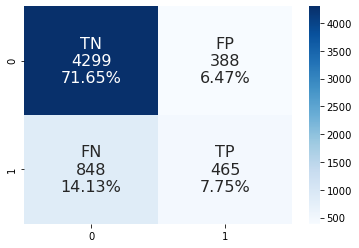

In [27]:
knn2 = KNeighborsClassifier().fit(X_tr2, y_tr)
y_pred_knn_tr2 = knn2.predict(X_tr2)
y_pred_knn_val2 = knn2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_knn_tr2, y_pred_knn_val2, knn2)

Training Accuracy:  0.2719047619047619
Validation Accuracy:  0.2818333333333333
Training F1 Score:  0.37109246462652185
Validation F1 Score:  0.37523560968537045
Training AUC Score:  0.7284437469723117
Validation AUC Score:  0.7283542283098671
Training Recall Score:  0.9688573883161512
Validation Recall Score:  0.9855293221629855
Training Precision Score:  0.2294973544973545
Validation Precision Score:  0.23173352435530087

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.07      0.14     16344
           1       0.23      0.97      0.37      4656

    accuracy                           0.27     21000
   macro avg       0.56      0.52      0.25     21000
weighted avg       0.75      0.27      0.19     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.08      0.16      4687
           1       0.23      0.99      0.38      1313

    accuracy

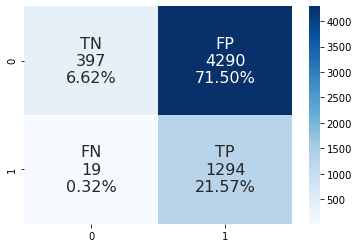

In [28]:
gnb2 = GaussianNB().fit(X_tr2, y_tr)
y_pred_gnb_tr2 = gnb2.predict(X_tr2)
y_pred_gnb_val2 = gnb2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_gnb_tr2, y_pred_gnb_val2, gnb2)

Training Accuracy:  0.8196666666666667
Validation Accuracy:  0.8156666666666667
Training F1 Score:  0.4483612527312454
Validation F1 Score:  0.4245577523413111
Training AUC Score:  0.7931289848792205
Validation AUC Score:  0.7764166283855248
Training Recall Score:  0.33054123711340205
Validation Recall Score:  0.31073876618431073
Training Precision Score:  0.6966953372566772
Validation Precision Score:  0.6699507389162561

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16344
           1       0.70      0.33      0.45      4656

    accuracy                           0.82     21000
   macro avg       0.77      0.64      0.67     21000
weighted avg       0.80      0.82      0.79     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.67      0.31      0.42      1313

    accuracy 

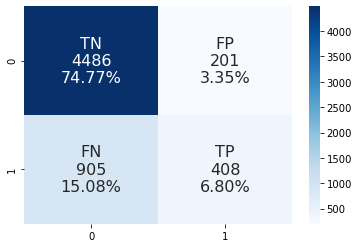

In [29]:
abc2 = AdaBoostClassifier().fit(X_tr2, y_tr)
y_pred_abc_tr2 = abc2.predict(X_tr2)
y_pred_abc_val2 = abc2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_abc_tr2, y_pred_abc_val2, abc2)

Training Accuracy:  0.8211904761904761
Validation Accuracy:  0.8195
Training F1 Score:  0.4797007066648191
Validation F1 Score:  0.4630639563708478
Training AUC Score:  0.7603242590994647
Validation AUC Score:  0.7514604655062674
Training Recall Score:  0.37177835051546393
Validation Recall Score:  0.3556740289413557
Training Precision Score:  0.675907848496681
Validation Precision Score:  0.6633522727272727

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16344
           1       0.68      0.37      0.48      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.66      0.69     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.46      1313

    accuracy               

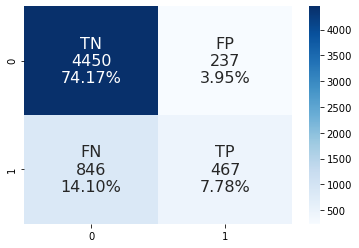

In [30]:
lda2 = LinearDiscriminantAnalysis().fit(X_tr2, y_tr)
y_pred_lda_tr2 = lda2.predict(X_tr2)
y_pred_lda_val2 = lda2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_lda_tr2, y_pred_lda_val2, lda2)

Training Accuracy:  0.829
Validation Accuracy:  0.8208333333333333
Training F1 Score:  0.5017344248647149
Validation F1 Score:  0.4675581971272908
Training AUC Score:  0.8137770957069063
Validation AUC Score:  0.7832098180850893
Training Recall Score:  0.38831615120274915
Validation Recall Score:  0.3594821020563595
Training Precision Score:  0.7087416699333595
Validation Precision Score:  0.6685552407932012

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16344
           1       0.71      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.78      0.67      0.70     21000
weighted avg       0.82      0.83      0.81     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy               

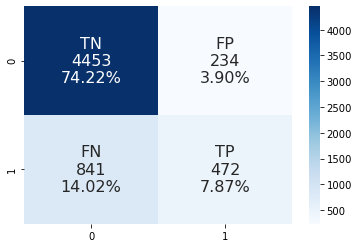

In [31]:
gbc2 = GradientBoostingClassifier().fit(X_tr2, y_tr)
y_pred_gbc_tr2 = gbc2.predict(X_tr2)
y_pred_gbc_val2 = gbc2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_gbc_tr2, y_pred_gbc_val2, gbc2)

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.7246666666666667
Training F1 Score:  0.9988173314697344
Validation F1 Score:  0.39398385913426265
Training AUC Score:  0.9999991983985211
Validation AUC Score:  0.6117205129450924
Training Recall Score:  0.9976374570446735
Validation Recall Score:  0.408987052551409
Training Precision Score:  1.0
Validation Precision Score:  0.38004246284501064

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      1.00      1.00      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                 

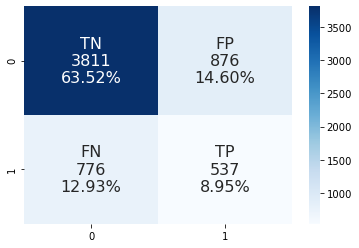

In [47]:
dtc2 = DecisionTreeClassifier().fit(X_tr2, y_tr)
y_pred_dtc_tr2 = dtc2.predict(X_tr2)
y_pred_dtc_val2 = dtc2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_dtc_tr2, y_pred_dtc_val2, dtc2)

In [48]:
dtc2.feature_importances_

array([0.02870776, 0.00956373, 0.01409289, 0.0098042 , 0.05007962,
       0.16238777, 0.03439692, 0.00520522, 0.00508949, 0.00613566,
       0.00501285, 0.0378662 , 0.01934428, 0.01961474, 0.01808885,
       0.01681576, 0.02681049, 0.02449806, 0.02327959, 0.04046219,
       0.02165339, 0.02375999, 0.02971633, 0.00888163, 0.03229433,
       0.02442215, 0.02859447, 0.02434257, 0.04034124, 0.04080509,
       0.03820093, 0.03232941, 0.02490411, 0.02198565, 0.02644313,
       0.02406928])

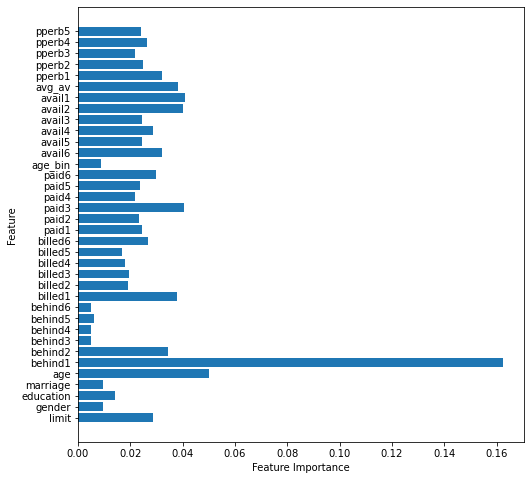

In [49]:
def plot_feature_importances(model):
    n_features = X_tr2.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train2.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel('Feature')

plot_feature_importances(dtc2)
plt.savefig('../images/dtc2_feature_importance.png')

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.8143333333333334
Training F1 Score:  0.9988183478354281
Validation F1 Score:  0.4597478176527643
Training AUC Score:  0.9999985742006482
Validation AUC Score:  0.7546816874988118
Training Recall Score:  0.9984965635738832
Validation Recall Score:  0.361005331302361
Training Precision Score:  0.9991403395658714
Validation Precision Score:  0.6328437917222964

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      1.00      1.00      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy    

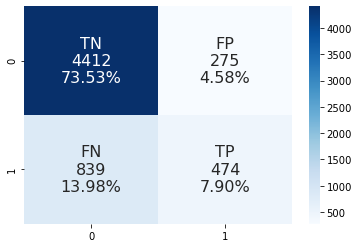

In [25]:
rfc2 = RandomForestClassifier().fit(X_tr2, y_tr)
y_pred_rfc_tr2 = rfc2.predict(X_tr2)
y_pred_rfc_val2 = rfc2.predict(X_val2)
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_rfc_tr2, y_pred_rfc_val2, rfc2)

In [ ]:
plt.style.use('seaborn-whitegrid')
importance = rfc2.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('predclass', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [ ]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score



Bagging classifier performance:
Balanced accuracy: 0.65 - Geometric mean 0.58
Balanced Bagging classifier performance:
Balanced accuracy: 0.70 - Geometric mean 0.68

Training Accuracy:  0.9989047619047619
Validation Accuracy:  0.8115
Training F1 Score:  0.9975255513717051
Validation F1 Score:  0.45388701110574603
Training AUC Score: 0.9999937383097595
Validation AUC Score: 0.7472943343964304
Training Recall Score:  0.9957044673539519
Validation Recall Score:  0.357958872810358
Training Precision Score:  0.9993533089027807
Validation Precision Score:  0.6200527704485488

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      1.00      1.00      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Validation Classification Report: 
              precision    

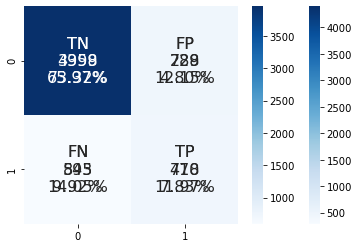

In [48]:
bagging = BaggingClassifier(n_estimators=50, random_state=42).fit(X_tr2, y_tr)
balanced_bagging = BalancedBaggingClassifier(n_estimators=50, random_state=42).fit(X_tr2, y_tr)
y_pred_bc_tr = bagging.predict(X_tr2)
y_pred_bc_val = bagging.predict(X_val2)
y_pred_bbc_tr = balanced_bagging.predict(X_tr2)
y_pred_bbc_val = balanced_bagging.predict(X_val2)
print('Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bc), geometric_mean_score(y_val, y_pred_bc)))
print('Balanced Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bbc), geometric_mean_score(y_val, y_pred_bbc)))
print("")


In [ ]:
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_bc_tr, y_pred_bc_val, bagging)

In [ ]:
get_metrics(X_tr2, y_tr, X_val2, y_val, y_pred_bbc_tr, y_pred_bbc_val, balanced_bagging)
